# 1. Install and Import Dependencies

In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
from pdf2image import convert_from_path

In [2]:
# Store pdf with convert_from_path function
images = convert_from_path(pdf_path='Data Source PDF/BCA.pdf', dpi=350)
for index, img in enumerate(images):
    img.save(f'PDF Images\BCA\page{index + 1}.jpg', 'JPEG')

In [3]:
def cleanup_text(text):
    # strip out non-ASCII text so we can draw the text on the image using OpenCV
	return "".join(c if ord(c) < 128 else "" for c in text).strip()

# 2. Read in images or video

In [4]:
IMAGE_PATH = os.path.join('.', 'PDF Images\BCA\page1.jpg')
IMAGE_PATH

'.\\PDF Image\\page1.jpg'

In [5]:
reader = easyocr.Reader(lang_list=['en', 'id', 'ms'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[259, 215], [562, 215], [562, 360], [259, 360]], 'BCA', 0.9998779733586949),
 ([[1010, 264], [1874, 264], [1874, 349], [1010, 349]],
  'REKENING TAHAPAN',
  0.9944522103346217),
 ([[140, 406], [489, 406], [489, 444], [140, 444]],
  'KCP PURI KEMBANGAN',
  0.9994579164494076),
 ([[139, 466], [224, 466], [224, 515], [139, 515]], 'SOE', 0.9998244969991322),
 ([[236, 470], [290, 470], [290, 514], [236, 514]], 'TA', 0.9993461121322376),
 ([[304, 470], [386, 470], [386, 514], [304, 514]], 'WIE', 0.9997994451426735),
 ([[1582, 472], [1894, 472], [1894, 522], [1582, 522]],
  'NO. REKENING',
  0.9857147354757979),
 ([[2135, 472], [2380, 472], [2380, 522], [2135, 522]],
  '7030073392',
  0.9999954009248005),
 ([[139, 526], [339, 526], [339, 576], [139, 576]],
  'CIPONDOH',
  0.9996732555178075),
 ([[1580, 547], [1800, 547], [1800, 591], [1580, 591]],
  'HALAMAN',
  0.9997048633971382),
 ([[2138, 549], [2239, 549], [2239, 598], [2138, 598]],
  '1 / 4',
  0.8502063709414893),
 ([[143, 584], [43

# 3. Draw Results

[INFO] 0.9999: BCA
[INFO] 0.9945: REKENING TAHAPAN
[INFO] 0.9995: KCP PURI KEMBANGAN
[INFO] 0.9998: SOE
[INFO] 0.9993: TA
[INFO] 0.9998: WIE
[INFO] 0.9857: NO. REKENING
[INFO] 1.0000: 7030073392
[INFO] 0.9997: CIPONDOH
[INFO] 0.9997: HALAMAN
[INFO] 0.8502: 1 / 4
[INFO] 0.9278: PETIR RT 013
[INFO] 0.4565: RW 003
[INFO] 0.7126: PERIODE
[INFO] 0.7234: JANUARI 2021
[INFO] 0.9991: JL
[INFO] 0.9382: PETIR UTAMA 66
[INFO] 0.8472: TANGERANG 15147
[INFO] 0.9986: MATA UANG
[INFO] 0.9990: IDR
[INFO] 0.9998: INDONESIA
[INFO] 1.0000: CATATAN:
[INFO] 0.8695: Apabila nasabah tidak melakukan sanggahan atas Laporan Mutasi Rekening ini sampai
[INFO] 0.8560: BCA berhak setiap saat melakukan koreksi apabila ada kesalahan pada Laporan Mutasi
[INFO] 0.9782: dengan akhir bulan berikutnya; nasabah dianggap telah menyetujui segala data yang
[INFO] 0.8356: Rekening.
[INFO] 0.6211: tercantum pada Laporan Mutasi Rekening ini.
[INFO] 0.9999: TANGGAL
[INFO] 0.9998: KETERANGAN
[INFO] 1.0000: CBG
[INFO] 0.6318: MUTAS

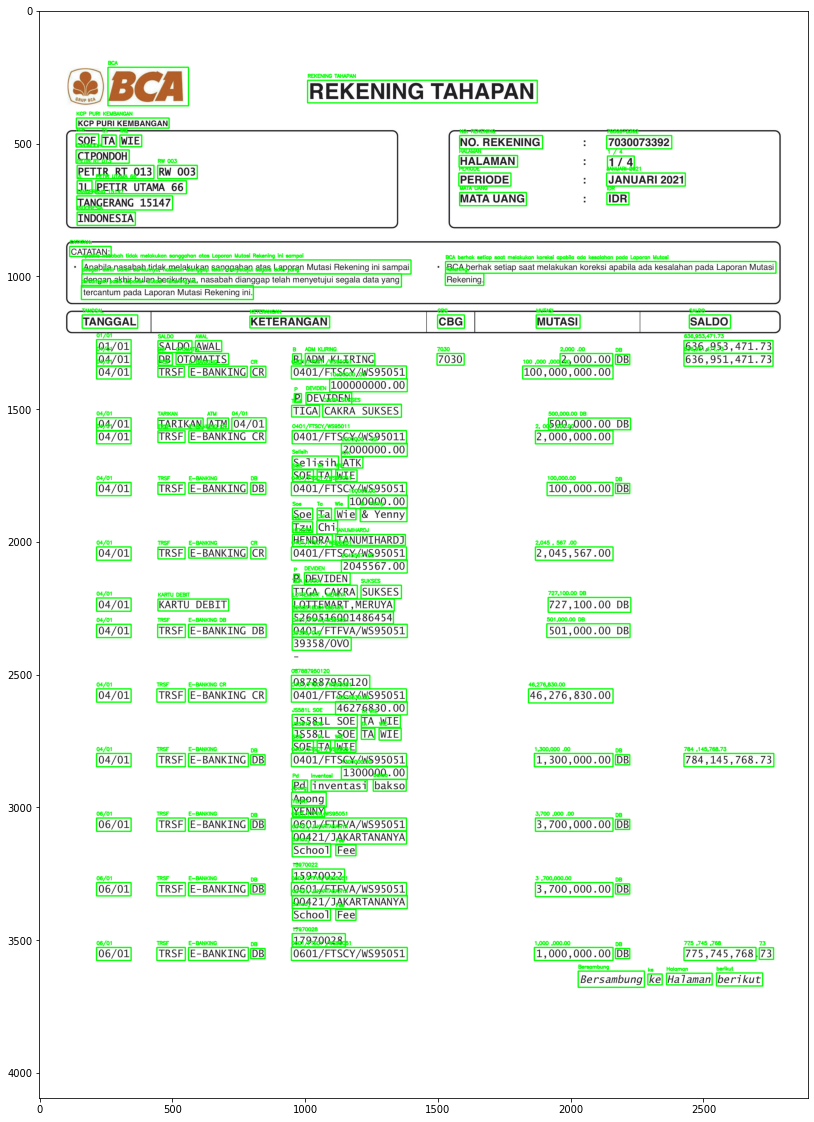

In [23]:
image = cv2.imread(IMAGE_PATH)

for (bbox, text, prob) in result:
	# display the OCR'd text and associated probability
	print(f"[INFO] {prob:.4f}: {text}")

	# unpack the bounding box
	(top_left, top_right, bottom_right, bottom_left) = bbox
	top_left = (int(top_left[0]), int(top_left[1]))
	top_right = (int(top_right[0]), int(top_right[1]))
	bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
	bottom_left = (int(bottom_left[0]), int(bottom_left[1]))

	# cleanup the text and draw the box surrounding the text along with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 3)
	cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
 
# Resizing display area
plt.figure(figsize=(20,20))

# Show the image using matplotlib
plt.imshow(image)

# Save annotated image
plt.savefig("Bounding Images/result.jpg")

In [24]:
# show the output image
from PIL import Image
Image.open('Bounding Images/result.jpg', 'r').show()